A neural network is a type of machine learning algorithm that is modeled after the structure and function of the human brain. It consists of interconnected nodes, called neurons, which are organized into layers. Each neuron receives input from other neurons, processes that input, and then generates an output signal that is transmitted to other neurons in the next layer.

### The CIFAR-10 dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

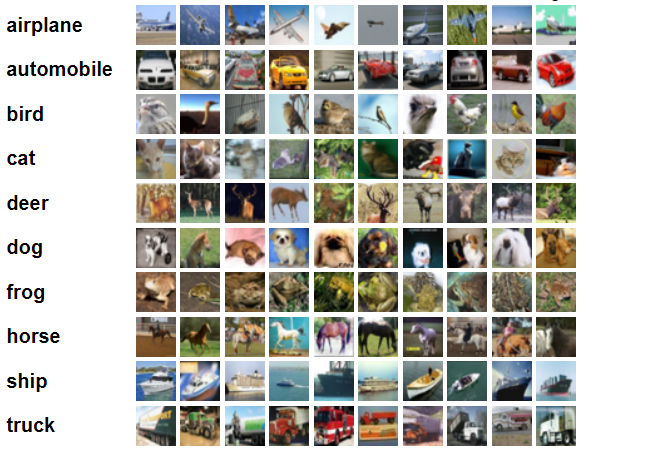

### import package

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Flatten, Conv2D, Flatten, MaxPooling2D, Activation, Input, GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image
import tensorflow as tf

import warnings
# warnings.filterwarnings("ignore")
warnings.filterwarnings("always")

%matplotlib inline

In [2]:
# tf.__version__ # To check your TensorFlow version 

In [3]:
# tf.config.list_physical_devices('GPU')

In [4]:
# tf.test.is_gpu_available()

In [5]:
# tf.test.is_built_with_cuda()

In [6]:
# def load_data():
#     x_train = input()
#     y_train = input()
#     x_test  = input()
#     y_test  = input()
    
#     return x_train, y_train, x_test, y_test

# load_data()

In [7]:
# def load_data():
#     x_train = input()
#     y_train = input()
#     x_test  = input()
#     y_test  = input()
    
# #     return x_train, x_test,y_train, y_test
#     return (x_train, x_test),(y_train, y_test)

# # a,b,c,d = load_data()
# (a,b),(c,d) = load_data()

#### Load the data

In [8]:
#Data Set Splitting
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

(x_train,y_train),_ = cifar10.load_data()

In [9]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [10]:
x_train[0][0]

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

**Scaling Training Dataset**

In [11]:
x_train/255.0

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

**Data Visulization**

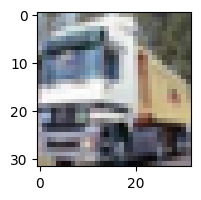

In [12]:
plt.figure(figsize=(2,2)) # image size
plt.imshow(x_train[1])
plt.show()

In [13]:
x_train[0].size

3072

In [14]:
x_train[0].shape

(32, 32, 3)

**Here are the first 9 images in the training dataset**

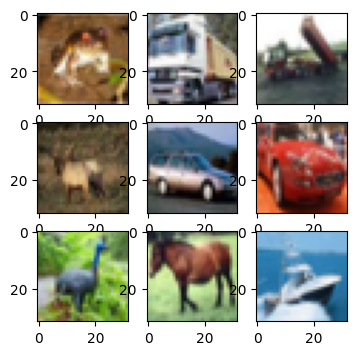

In [15]:
fig=plt.figure(figsize=(4,4)) #canvas create
for i in range(9):
    fig.add_subplot(3,3,i+1)
    plt.imshow(x_train[i])
    
plt.show()

**Here are the first 49 images in the training dataset**

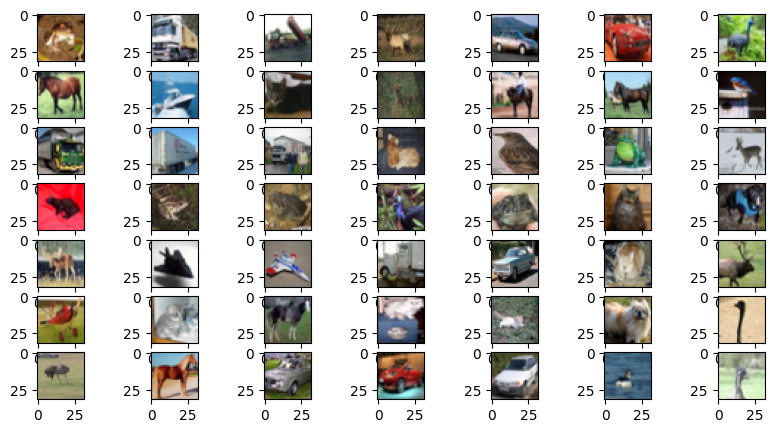

In [16]:
fig=plt.figure(figsize=(10,5)) #canvas create
for i in range(49):
    fig.add_subplot(7,7,i+1)
    plt.imshow(x_train[i])
    
plt.show()

Init signature:
Conv2D(
    filters,
    
    kernel_size,
    
    strides=(1, 1),
    
    padding='valid',
    
    data_format=None,
    
    dilation_rate=(1, 1),
    
    groups=1,
    
    activation=None,
    
    use_bias=True,
    
    kernel_initializer='glorot_uniform',
    
    bias_initializer='zeros',
    
    kernel_regularizer=None,
    
    bias_regularizer=None,
    
    activity_regularizer=None,
    
    kernel_constraint=None,
    
    bias_constraint=None,
    
    **kwargs,
)

Docstring:     
2D convolution layer (e.g. spatial convolution over images).

This layer creates a convolution kernel that is convolved
with the layer input to produce a tensor of
outputs. If `use_bias` is True,
a bias vector is created and added to the outputs. Finally, if
`activation` is not `None`, it is applied to the outputs as well.

When using this layer as the first layer in a model,
provide the keyword argument `input_shape`
(tuple of integers or `None`, does not include the sample axis),
e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
in `data_format="channels_last"`. You can use `None` when
a dimension has variable size.

Examples:

>>> # The inputs are 28x28 RGB images with `channels_last` and the batch
>>> # size is 4.
>>> input_shape = (4, 28, 28, 3)
>>> x = tf.random.normal(input_shape)
>>> y = tf.keras.layers.Conv2D(
... 2, 3, activation='relu', input_shape=input_shape[1:])(x)
>>> print(y.shape)
(4, 26, 26, 2)

>>> # With `dilation_rate` as 2.
>>> input_shape = (4, 28, 28, 3)
>>> x = tf.random.normal(input_shape)
>>> y = tf.keras.layers.Conv2D(
... 2, 3, activation='relu', dilation_rate=2, input_shape=input_shape[1:])(x)
>>> print(y.shape)
(4, 24, 24, 2)

>>> # With `padding` as "same".
>>> input_shape = (4, 28, 28, 3)
>>> x = tf.random.normal(input_shape)
>>> y = tf.keras.layers.Conv2D(
... 2, 3, activation='relu', padding="same", input_shape=input_shape[1:])(x)
>>> print(y.shape)
(4, 28, 28, 2)

>>> # With extended batch shape [4, 7]:
>>> input_shape = (4, 7, 28, 28, 3)
>>> x = tf.random.normal(input_shape)
>>> y = tf.keras.layers.Conv2D(
... 2, 3, activation='relu', input_shape=input_shape[2:])(x)
>>> print(y.shape)
(4, 7, 26, 26, 2)


Args:
  filters: Integer, the dimensionality of the output space (i.e. the number of
    output filters in the convolution).
    
  kernel_size: An integer or tuple/list of 2 integers, specifying the height
    and width of the 2D convolution window. Can be a single integer to specify
    the same value for all spatial dimensions.
    
  strides: An integer or tuple/list of 2 integers, specifying the strides of
    the convolution along the height and width. Can be a single integer to
    specify the same value for all spatial dimensions. Specifying any stride
    value != 1 is incompatible with specifying any `dilation_rate` value != 1.
    
  padding: one of `"valid"` or `"same"` (case-insensitive).
    `"valid"` means no padding. `"same"` results in padding with zeros evenly
    to the left/right or up/down of the input such that output has the same
    height/width dimension as the input.
    
  data_format: A string, one of `channels_last` (default) or `channels_first`.
    The ordering of the dimensions in the inputs. `channels_last` corresponds
    to inputs with shape `(batch_size, height, width, channels)` while
    `channels_first` corresponds to inputs with shape `(batch_size, channels,
    height, width)`. It defaults to the `image_data_format` value found in
    your Keras config file at `~/.keras/keras.json`. If you never set it, then
    it will be `channels_last`.
    
  dilation_rate: an integer or tuple/list of 2 integers, specifying the
    dilation rate to use for dilated convolution. Can be a single integer to
    specify the same value for all spatial dimensions. Currently, specifying
    any `dilation_rate` value != 1 is incompatible with specifying any stride
    value != 1.
    
  groups: A positive integer specifying the number of groups in which the
    input is split along the channel axis. Each group is convolved separately
    with `filters / groups` filters. The output is the concatenation of all
    the `groups` results along the channel axis. Input channels and `filters`
    must both be divisible by `groups`.
    
  activation: Activation function to use. If you don't specify anything, no
    activation is applied (see `keras.activations`).
    
  use_bias: Boolean, whether the layer uses a bias vector.
  kernel_initializer: Initializer for the `kernel` weights matrix (see
    `keras.initializers`). Defaults to 'glorot_uniform'.
  bias_initializer: Initializer for the bias vector (see
    `keras.initializers`). Defaults to 'zeros'.
    
  kernel_regularizer: Regularizer function applied to the `kernel` weights
    matrix (see `keras.regularizers`). 
    
  bias_regularizer: Regularizer function applied to the bias vector (see
    `keras.regularizers`). 
    
  activity_regularizer: Regularizer function applied to the output of the
    layer (its "activation") (see `keras.regularizers`).
  kernel_constraint: Constraint function applied to the kernel matrix (see
    `keras.constraints`).
    
  bias_constraint: Constraint function applied to the bias vector (see
    `keras.constraints`).
    
Input shape:
  4+D tensor with shape: `batch_shape + (channels, rows, cols)` if
    `data_format='channels_first'`
  or 4+D tensor with shape: `batch_shape + (rows, cols, channels)` if
    `data_format='channels_last'`.
    
Output shape:
  4+D tensor with shape: `batch_shape + (filters, new_rows, new_cols)` if
  `data_format='channels_first'` or 4+D tensor with shape: `batch_shape +
    (new_rows, new_cols, filters)` if `data_format='channels_last'`.  `rows`
    and `cols` values might have changed due to padding.

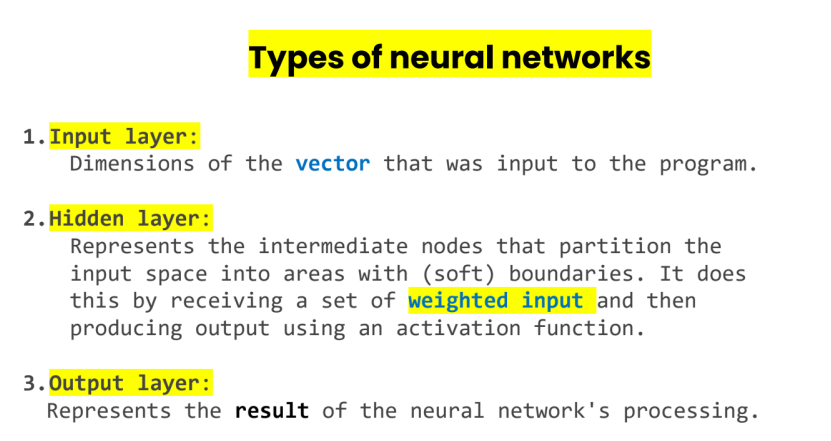

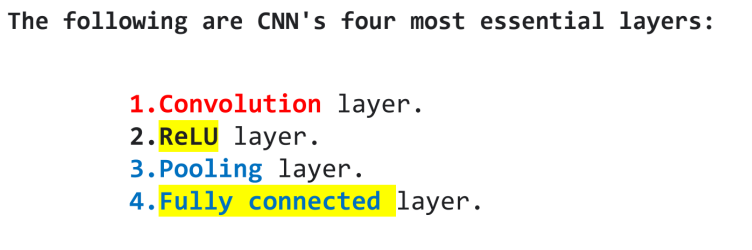

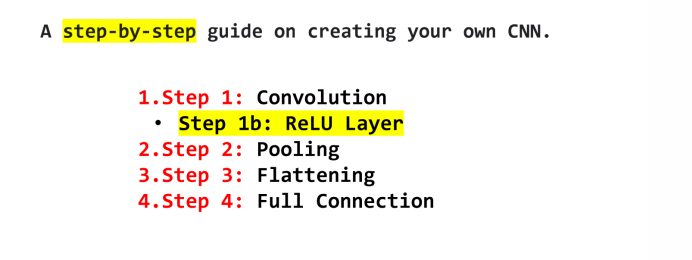

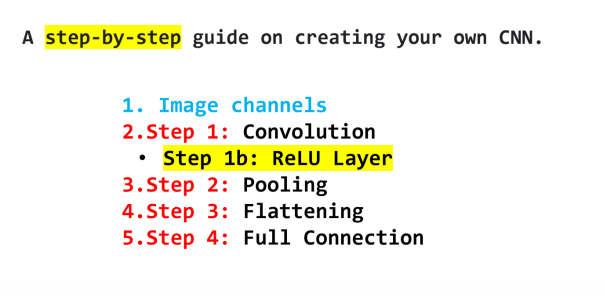

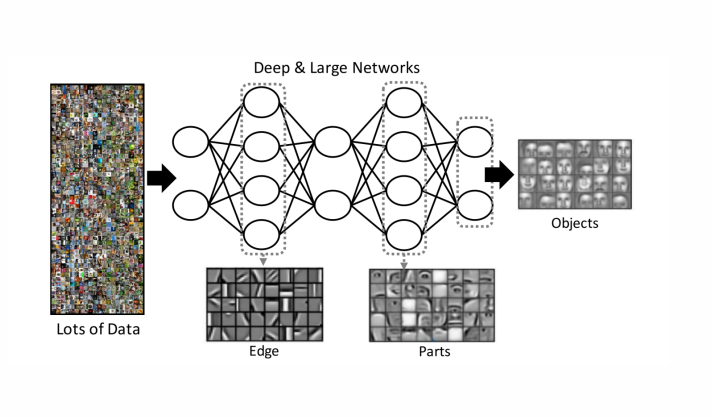

<!-- Init signature:
Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Docstring:     
2D convolution layer (e.g. spatial convolution over images).

This layer creates a convolution kernel that is convolved
with the layer input to produce a tensor of
outputs. If `use_bias` is True,
a bias vector is created and added to the outputs. Finally, if
`activation` is not `None`, it is applied to the outputs as well.

When using this layer as the first layer in a model,
provide the keyword argument `input_shape`
(tuple of integers or `None`, does not include the sample axis),
e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures
in `data_format="channels_last"`. You can use `None` when
a dimension has variable size.

Examples:

>>> # The inputs are 28x28 RGB images with `channels_last` and the batch
>>> # size is 4.
>>> input_shape = (4, 28, 28, 3)
>>> x = tf.random.normal(input_shape)
>>> y = tf.keras.layers.Conv2D(
... 2, 3, activation='relu', input_shape=input_shape[1:])(x)
>>> print(y.shape)
(4, 26, 26, 2)

>>> # With `dilation_rate` as 2.
>>> input_shape = (4, 28, 28, 3)
>>> x = tf.random.normal(input_shape)
>>> y = tf.keras.layers.Conv2D(
... 2, 3, activation='relu', dilation_rate=2, input_shape=input_shape[1:])(x)
>>> print(y.shape)
(4, 24, 24, 2)

>>> # With `padding` as "same".
>>> input_shape = (4, 28, 28, 3)
>>> x = tf.random.normal(input_shape)
>>> y = tf.keras.layers.Conv2D(
... 2, 3, activation='relu', padding="same", input_shape=input_shape[1:])(x)
>>> print(y.shape)
(4, 28, 28, 2)

>>> # With extended batch shape [4, 7]:
>>> input_shape = (4, 7, 28, 28, 3)
>>> x = tf.random.normal(input_shape)
>>> y = tf.keras.layers.Conv2D(
... 2, 3, activation='relu', input_shape=input_shape[2:])(x)
>>> print(y.shape)
(4, 7, 26, 26, 2)


Args:
  filters: Integer, the dimensionality of the output space (i.e. the number of
    output filters in the convolution).
  kernel_size: An integer or tuple/list of 2 integers, specifying the height
    and width of the 2D convolution window. Can be a single integer to specify
    the same value for all spatial dimensions.
  strides: An integer or tuple/list of 2 integers, specifying the strides of
    the convolution along the height and width. Can be a single integer to
    specify the same value for all spatial dimensions. Specifying any stride
    value != 1 is incompatible with specifying any `dilation_rate` value != 1.
  padding: one of `"valid"` or `"same"` (case-insensitive).
    `"valid"` means no padding. `"same"` results in padding with zeros evenly
    to the left/right or up/down of the input such that output has the same
    height/width dimension as the input.
  data_format: A string, one of `channels_last` (default) or `channels_first`.
    The ordering of the dimensions in the inputs. `channels_last` corresponds
    to inputs with shape `(batch_size, height, width, channels)` while
    `channels_first` corresponds to inputs with shape `(batch_size, channels,
    height, width)`. It defaults to the `image_data_format` value found in
    your Keras config file at `~/.keras/keras.json`. If you never set it, then
    it will be `channels_last`.
  dilation_rate: an integer or tuple/list of 2 integers, specifying the
    dilation rate to use for dilated convolution. Can be a single integer to
    specify the same value for all spatial dimensions. Currently, specifying
    any `dilation_rate` value != 1 is incompatible with specifying any stride
    value != 1.
  groups: A positive integer specifying the number of groups in which the
    input is split along the channel axis. Each group is convolved separately
    with `filters / groups` filters. The output is the concatenation of all
    the `groups` results along the channel axis. Input channels and `filters`
    must both be divisible by `groups`.
  activation: Activation function to use. If you don't specify anything, no
    activation is applied (see `keras.activations`).
  use_bias: Boolean, whether the layer uses a bias vector.
  kernel_initializer: Initializer for the `kernel` weights matrix (see
    `keras.initializers`). Defaults to 'glorot_uniform'.
  bias_initializer: Initializer for the bias vector (see
    `keras.initializers`). Defaults to 'zeros'.
  kernel_regularizer: Regularizer function applied to the `kernel` weights
    matrix (see `keras.regularizers`). 
  bias_regularizer: Regularizer function applied to the bias vector (see
    `keras.regularizers`). 
  activity_regularizer: Regularizer function applied to the output of the
    layer (its "activation") (see `keras.regularizers`).
  kernel_constraint: Constraint function applied to the kernel matrix (see
    `keras.constraints`).
  bias_constraint: Constraint function applied to the bias vector (see
    `keras.constraints`).
Input shape:
  4+D tensor with shape: `batch_shape + (channels, rows, cols)` if
    `data_format='channels_first'`
  or 4+D tensor with shape: `batch_shape + (rows, cols, channels)` if
    `data_format='channels_last'`.
Output shape:
  4+D tensor with shape: `batch_shape + (filters, new_rows, new_cols)` if
  `data_format='channels_first'` or 4+D tensor with shape: `batch_shape +
    (new_rows, new_cols, filters)` if `data_format='channels_last'`.  `rows`
    and `cols` values might have changed due to padding.

Returns:
  A tensor of rank 4+ representing
  `activation(conv2d(inputs, kernel) + bias)`.

Raises:
  ValueError: if `padding` is `"causal"`.
  ValueError: when both `strides > 1` and `dilation_rate > 1`.
File:           c:\users\acer\anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\keras\layers\convolutional.py
Type:           type
Subclasses:     Conv2DTranspose, DepthwiseConv2D -->

**Components of Nueral Network**

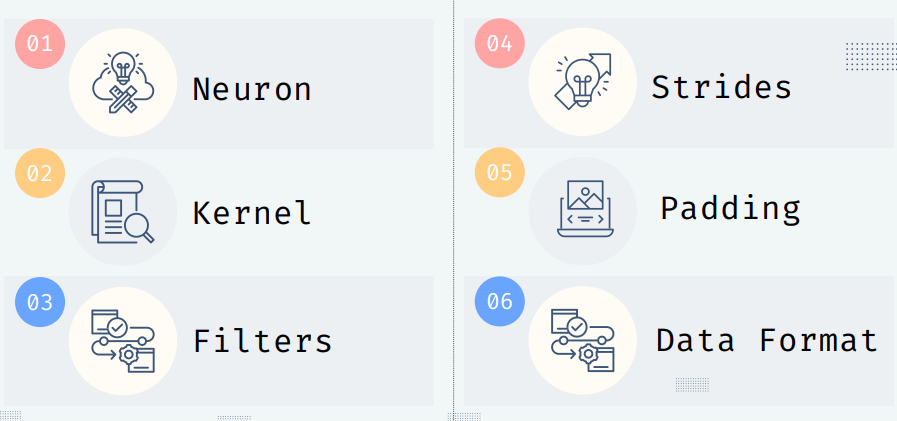

**Kernel**
In Convolutional neural network, the kernel is
nothing but a filter that is used to extract the
features from the images. The kernel is a matrix
that moves over the input data, performs the
dot product with the sub-region of input data,
and gets the output as the matrix of dot
products.
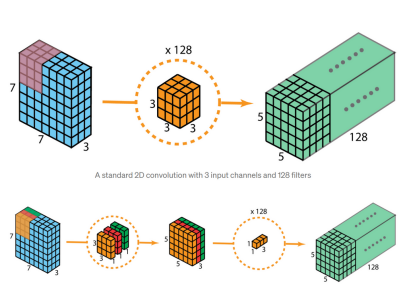

**Build A Model**


In [17]:
model = Sequential()
model.add(Conv2D( input_shape = (32, 32, 3),
                filters = 10,
                kernel_size = (3,3),
                strides = (1,1), #Jump row and col
                padding = 'valid',
#                 activation="relu"
                ))

model.output_shape

(None, 30, 30, 10)

In [18]:
model = Sequential()
model.add(Conv2D( input_shape = (32, 32, 3),
                filters = 10,
                kernel_size = (3,3),
                strides = (1,1), #Jump row and col
                padding = 'same' 
                ))

model.output_shape

(None, 32, 32, 10)

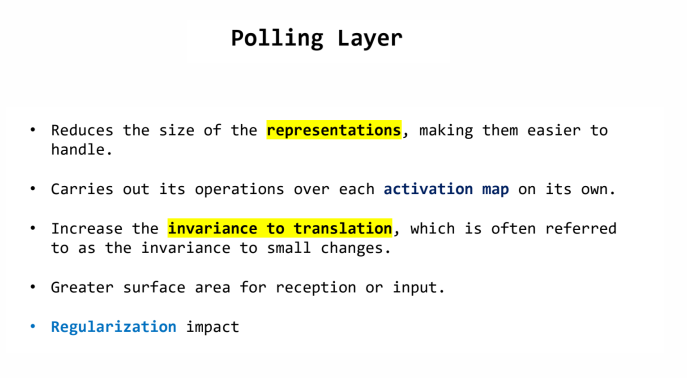

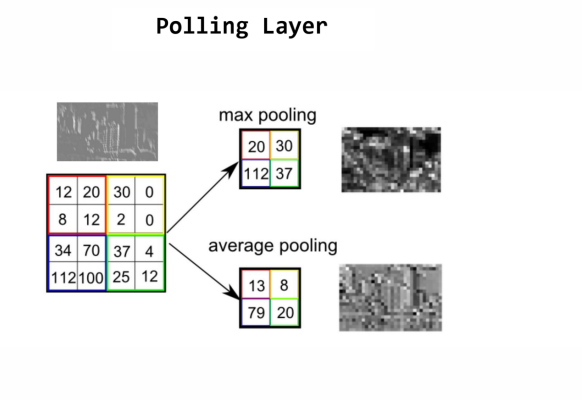

Init signature:
MaxPooling2D(

    pool_size=(2, 2),
    
    strides=None,
    
    padding='valid',
    
    data_format=None,
    
    **kwargs,
)
Docstring:     
Max pooling operation for 2D spatial data.

Downsamples the input along its spatial dimensions (height and width)
by taking the maximum value over an input window
(of size defined by `pool_size`) for each channel of the input.
The window is shifted by `strides` along each dimension.

The resulting output,
when using the `"valid"` padding option, has a spatial shape
(number of rows or columns) of:
`output_shape = math.floor((input_shape - pool_size) / strides) + 1`
(when `input_shape >= pool_size`)

The resulting output shape when using the `"same"` padding option is:
`output_shape = math.floor((input_shape - 1) / strides) + 1`

For example, for `strides=(1, 1)` and `padding="valid"`:

>>> x = tf.constant([[1., 2., 3.],
...                  [4., 5., 6.],
...                  [7., 8., 9.]])
>>> x = tf.reshape(x, [1, 3, 3, 1])
>>> max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
...    strides=(1, 1), padding='valid')
>>> max_pool_2d(x)
<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
  array([[[[5.],
           [6.]],
          [[8.],
           [9.]]]], dtype=float32)>

For example, for `strides=(2, 2)` and `padding="valid"`:

>>> x = tf.constant([[1., 2., 3., 4.],
...                  [5., 6., 7., 8.],
...                  [9., 10., 11., 12.]])
>>> x = tf.reshape(x, [1, 3, 4, 1])
>>> max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
...    strides=(2, 2), padding='valid')
>>> max_pool_2d(x)
<tf.Tensor: shape=(1, 1, 2, 1), dtype=float32, numpy=
  array([[[[6.],
           [8.]]]], dtype=float32)>

Usage Example:

>>> input_image = tf.constant([[[[1.], [1.], [2.], [4.]],
...                            [[2.], [2.], [3.], [2.]],
...                            [[4.], [1.], [1.], [1.]],
...                            [[2.], [2.], [1.], [4.]]]])
>>> output = tf.constant([[[[1], [0]],
...                       [[0], [1]]]])
>>> model = tf.keras.models.Sequential()
>>> model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
...    input_shape=(4, 4, 1)))
>>> model.compile('adam', 'mean_squared_error')
>>> model.predict(input_image, steps=1)
array([[[[2.],
         [4.]],
        [[4.],
         [4.]]]], dtype=float32)

For example, for stride=(1, 1) and padding="same":

>>> x = tf.constant([[1., 2., 3.],
...                  [4., 5., 6.],
...                  [7., 8., 9.]])
>>> x = tf.reshape(x, [1, 3, 3, 1])
>>> max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(2, 2),
...    strides=(1, 1), padding='same')
>>> max_pool_2d(x)
<tf.Tensor: shape=(1, 3, 3, 1), dtype=float32, numpy=
  array([[[[5.],
           [6.],
           [6.]],
          [[8.],
           [9.],
           [9.]],
          [[8.],
           [9.],
           [9.]]]], dtype=float32)>

Args:

  pool_size: integer or tuple of 2 integers,
    window size over which to take the maximum.
    `(2, 2)` will take the max value over a 2x2 pooling window.
    If only one integer is specified, the same window length
    will be used for both dimensions.
    
  strides: Integer, tuple of 2 integers, or None.
    Strides values.  Specifies how far the pooling window moves
    for each pooling step. If None, it will default to `pool_size`.
    
  padding: One of `"valid"` or `"same"` (case-insensitive).
    `"valid"` means no padding. `"same"` results in padding evenly to
    the left/right or up/down of the input such that output has the same
    height/width dimension as the input.
    
  data_format: A string,
    one of `channels_last` (default) or `channels_first`.
    The ordering of the dimensions in the inputs.
    `channels_last` corresponds to inputs with shape
    `(batch, height, width, channels)` while `channels_first`
    corresponds to inputs with shape
    `(batch, channels, height, width)`.
    It defaults to the `image_data_format` value found in your
    Keras config file at `~/.keras/keras.json`.
    If you never set it, then it will be "channels_last".

Input shape:

  - If `data_format='channels_last'`:
  
    4D tensor with shape `(batch_size, rows, cols, channels)`.
    
  - If `data_format='channels_first'`:
  
    4D tensor with shape `(batch_size, channels, rows, cols)`.

Output shape:

  - If `data_format='channels_last'`:
  
    4D tensor with shape `(batch_size, pooled_rows, pooled_cols, channels)`.
    
  - If `data_format='channels_first'`:
  
    4D tensor with shape `(batch_size, channels, pooled_rows, pooled_cols)`.   

In [19]:
model = Sequential()
model.add(Conv2D( input_shape = (32, 32, 3),
                filters = 10,
                kernel_size = (3,3),
                strides = (1,1), #Jump row and col
                padding = 'same' 
                ))
model.add(MaxPooling2D(pool_size= (2,2)))
model.output_shape

(None, 16, 16, 10)

In [20]:
model = Sequential()
model.add(Conv2D( input_shape = (32, 32, 3),
                filters = 10,
                kernel_size = (3,3),
                strides = (1,1), #Jump row and col
                padding = 'valid' 
                ))
# model.add(MaxPooling2D(pool_size= (2,2)))
model.output_shape

(None, 30, 30, 10)

In [21]:
model = Sequential()
model.add(Conv2D( input_shape = (32, 32, 3),
                filters = 10,
                kernel_size = (3,3),
                strides = (1,1), #Jump row and col
                padding = 'valid' 
                ))
model.add(MaxPooling2D(pool_size= (2,2)))
model.output_shape

(None, 15, 15, 10)

In [22]:
model = Sequential()
model.add(Conv2D( input_shape = (32, 32, 3),
                filters = 10,
                kernel_size = (3,3),
                strides = (1,1), #Jump row and col
                padding = 'valid' 
                ))
model.add(MaxPooling2D(pool_size= (2,2),padding="valid"))
model.output_shape

(None, 15, 15, 10)

In [23]:
model = Sequential()
model.add(Conv2D( input_shape = (32, 32, 3),
                filters = 10,
                kernel_size = (3,3),
                strides = (1,1), #Jump row and col
                padding = 'valid' 
                ))
model.add(MaxPooling2D(pool_size= (2,2),padding="same"))
model.output_shape

(None, 15, 15, 10)

In [24]:
model = Sequential()
model.add(Conv2D( input_shape = (32, 32, 3),
                filters = 10,
                kernel_size = (3,3),
                strides = (1,1), #Jump row and col
                padding = 'valid' 
                ))
model.add(MaxPooling2D(pool_size= (2,2),padding="valid",strides=(1,1)))
model.output_shape

(None, 29, 29, 10)

In [25]:
model = Sequential()
model.add(Conv2D( input_shape = (32, 32, 3),
                filters = 10,
                kernel_size = (3,3),
                strides = (1,1), #Jump row and col
                padding = 'valid' 
                ))
model.add(MaxPooling2D(pool_size= (2,2),padding="valid",strides=(2,2)))
model.output_shape

(None, 15, 15, 10)

In [26]:
model = Sequential()
model.add(Conv2D( input_shape = (32, 32, 3),
                filters = 10,
                kernel_size = (3,3),
                strides = (1,1), #Jump row and col
                padding = 'valid' 
                ))
model.add(MaxPooling2D(pool_size= (2,2),padding="same",strides=(1,1)))
model.output_shape

(None, 30, 30, 10)

In [27]:
model = Sequential()
model.add(Conv2D( input_shape = (32, 32, 3),
                filters = 10,
                kernel_size = (3,3),
                strides = (1,1), #Jump row and col
                padding = 'same' 
                ))
model.add(MaxPooling2D(pool_size= (2,2),padding="same",strides=(1,1)))
model.output_shape

(None, 32, 32, 10)

Init signature: GlobalAveragePooling2D(*args, **kwargs)
Docstring:     
Global average pooling operation for spatial data.

Examples:

>>> input_shape = (2, 4, 5, 3)
>>> x = tf.random.normal(input_shape)
>>> y = tf.keras.layers.GlobalAveragePooling2D()(x)
>>> print(y.shape)
(2, 3)

Args:

    data_format: A string,
      one of `channels_last` (default) or `channels_first`.
      The ordering of the dimensions in the inputs.
      `channels_last` corresponds to inputs with shape
      `(batch, height, width, channels)` while `channels_first`
      corresponds to inputs with shape
      `(batch, channels, height, width)`.
      It defaults to the `image_data_format` value found in your
      Keras config file at `~/.keras/keras.json`.
      If you never set it, then it will be "channels_last".
      
    keepdims: A boolean, whether to keep the spatial dimensions or not.
      If `keepdims` is `False` (default), the rank of the tensor is reduced
      for spatial dimensions.
      If `keepdims` is `True`, the spatial dimensions are retained with
      length 1.
      The behavior is the same as for `tf.reduce_mean` or `np.mean`.

Input shape:

  - If `data_format='channels_last'`:
    4D tensor with shape `(batch_size, rows, cols, channels)`.
  - If `data_format='channels_first'`:
    4D tensor with shape `(batch_size, channels, rows, cols)`.

Output shape:
  - If `keepdims`=False:
    2D tensor with shape `(batch_size, channels)`.
  - If `keepdims`=True:
    - If `data_format='channels_last'`:
      4D tensor with shape `(batch_size, 1, 1, channels)`
    - If `data_format='channels_first'`:
      4D tensor with shape `(batch_size, channels, 1, 1)` 

In [28]:
model = Sequential()
model.add(Conv2D( input_shape = (32, 32, 3),
                filters = 10,
                kernel_size = (3,3),
                strides = (1,1), #Jump row and col
                padding = 'valid' 
                ))
model.add(GlobalAveragePooling2D())
model.output_shape

(None, 10)

Init signature: Flatten(data_format=None, **kwargs)
Docstring:     
Flattens the input. Does not affect the batch size.

Note: If inputs are shaped `(batch,)` without a feature axis, then
flattening adds an extra channel dimension and output shape is `(batch, 1)`.

Args:
  data_format: A string,
    one of `channels_last` (default) or `channels_first`.
    The ordering of the dimensions in the inputs.
    `channels_last` corresponds to inputs with shape
    `(batch, ..., channels)` while `channels_first` corresponds to
    inputs with shape `(batch, channels, ...)`.
    It defaults to the `image_data_format` value found in your
    Keras config file at `~/.keras/keras.json`.
    If you never set it, then it will be "channels_last".

Example:

>>> model = tf.keras.Sequential()
>>> model.add(tf.keras.layers.Conv2D(64, 3, 3, input_shape=(3, 32, 32)))
>>> model.output_shape
(None, 1, 10, 64)

>>> model.add(Flatten())
>>> model.output_shape
(None, 640)

In [29]:
model = Sequential()
model.add(Conv2D( input_shape = (32, 32, 3),
                filters = 10,
                kernel_size = (3,3),
                strides = (1,1), #Jump row and col
                padding = 'valid' 
                ))
print(model.output_shape) #9000 =30*30*10
model.add(Flatten()) #converting multi-dimensional data into single dimensional data(FCNN- Fully connected neural network)
print(model.output_shape)

(None, 30, 30, 10)
(None, 9000)


import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm

# DEFINE THE NETWORK

# Generate random numbers within a truncated (bounded) 
# normal distribution:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

# Create the ‘Nnetwork’ class and define its arguments:
# Set the number of neurons/nodes for each layer
# and initialize the weight matrices:  
class Nnetwork:

    def __init__(self, 
                 no_of_in_nodes, 
                 no_of_out_nodes, 
                 no_of_hidden_nodes,
                 learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate 
        self.create_weight_matrices()
        
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neural network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes, 
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes, 
                                        self.no_of_hidden_nodes))

    def train(self, input_vector, target_vector):
        pass # More work is needed to train the network
            
    def run(self, input_vector):
        """
        running the network with an input vector 'input_vector'. 
        'input_vector' can be tuple, list or ndarray
        """
        # Turn the input vector into a column vector:
        input_vector = np.array(input_vector, ndmin=2).T
        # activation_function() implements the expit function,
        # which is an implementation of the sigmoid function:
        input_hidden = activation_function(self.weights_in_hidden @   input_vector)
        output_vector = activation_function(self.weights_hidden_out @ input_hidden)
        return output_vector 

# RUN THE NETWORK AND GET A RESULT

# Initialize an instance of the class:  
simple_network = Nnetwork(no_of_in_nodes=2, 
                               no_of_out_nodes=2, 
                               no_of_hidden_nodes=4,
                               learning_rate=0.6)

In [30]:
model  = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = "valid"
                ))
print(model.output_shape)
model.add(Flatten())
print(model.output_shape)
model.add(Dense(2)) # Fully connected layer
print(model.output_shape)

(None, 30, 30, 10)
(None, 9000)
(None, 2)
